In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:
import run_sensitivity

In [5]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [6]:
refdf = pd.read_excel('reference_10cc.xlsx')


In [7]:
dpath = r'C:\Users\oweisberg\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = r'C:\Users\Osnat\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
os.listdir(dpath)

['baseline_29062023_df.csv.gz',
 'baseline_29062023_mse.csv.gz',
 'baseline_29062023_sum.csv.gz',
 'param_sensitivity_29062023_df.csv.gz',
 'param_sensitivity_29062023_mse.csv.gz',
 'param_sensitivity_29062023_sum.csv.gz']

In [8]:
sum_df = pd.read_csv(os.path.join(dpath,'param_sensitivity_29062023_sum.csv.gz' ))
df =  pd.read_csv(os.path.join(dpath,'param_sensitivity_29062023_df.csv.gz' ))
mse_df = pd.read_csv(os.path.join(dpath,'param_sensitivity_29062023_mse.csv.gz' ))

In [9]:
basesum_df = pd.read_csv(os.path.join(dpath,'baseline_29062023_sum.csv.gz' ))
basedf =  pd.read_csv(os.path.join(dpath,'baseline_29062023_df.csv.gz' ))
basemse_df = pd.read_csv(os.path.join(dpath,'baseline_29062023_mse.csv.gz' ))

In [10]:
df.columns

Index(['Unnamed: 0', 'Bp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS',
       'ABp', 'ABh', 't', 'day', 'Bp[C]', 'ABp[C]', 'ABh[C]', 'run_id'],
      dtype='object')

In [11]:
mse_df.run_id.unique()

array(['param_sensitivity_ponly_MIXO_VmaxONp_6_h-2915878810672552954',
       'param_sensitivity_ponly_MIXO_VmaxONp_14_h-2842012260047406360',
       'param_sensitivity_ponly_FULL_KABp_7_h1282910774154216004',
       'param_sensitivity_ponly_MIXO_Mp_3_h-3482899955305135607',
       'param_sensitivity_ponly_MIXO_KICp_2_h-8759594774078324652',
       'param_sensitivity_ponly_MIXO_KICp_0_h5057485675366911932',
       'param_sensitivity_ponly_FULL_omegaP_14_h-939277589980610023',
       'param_sensitivity_ponly_FULL_KICp_4_h-7415192576282280273',
       'param_sensitivity_ponly_MIXO_VmaxICp_18_h-3600363634159207039',
       'param_sensitivity_ponly_FULL_EABp_17_h-3643752284097330621',
       'param_sensitivity_ponly_MIXO_VmaxONp_8_h472060908744712058',
       'param_sensitivity_ponly_MIXO_KINp_5_h8187686062580638811',
       'param_sensitivity_ponly_MIN_KINp_13_h373569411977113569',
       'param_sensitivity_ponly_MIN_VmaxICp_6_h-8461741180766533925',
       'param_sensitivity_ponly_MIN_Mp

In [12]:
mse_df['run_id'] = mse_df.run_id.str.replace(r'_mse.csv.gz','', regex=True)


In [13]:
#       'param_sensitivity_ponly_FULL_decayABp_16_h-6790287481405188016',
sum_df[['sen_param_model', 'idx']] = sum_df.run_id.str.replace('.*_ponly_', '', regex=True
            ).str.replace(r'_h[\-]?\d+','', regex=True
            ).str.rsplit('_', n=1, expand=True)

In [14]:
sum_df[['model', 'sen_param']] = sum_df.sen_param_model.str.split('_', n=1, expand=True)

In [15]:
#       'param_sensitivity_ponly_FULL_decayABp_16_h-6790287481405188016',
mse_df[['sen_param_model', 'idx']] = mse_df.run_id.str.replace('.*_ponly_', '', regex=True
            ).str.replace(r'_mse.csv.gz','', regex=True
            ).str.replace(r'_h[\-]?\d+','', regex=True
            ).str.rsplit('_', n=1, expand=True)

In [16]:
mse_df[['model', 'sen_param']] = mse_df.sen_param_model.str.split('_', n=1, expand=True)

In [17]:
#       'param_sensitivity_ponly_FULL_decayABp_16_h-6790287481405188016',
df[['sen_param_model', 'idx']] = df.run_id.str.replace('.*_ponly_', '', regex=True
            ).str.replace(r'_mse.csv.gz','', regex=True
            ).str.replace(r'_h[\-]?\d+','', regex=True
            ).str.rsplit('_', n=1, expand=True)

In [18]:
df[['model', 'sen_param']] = df.sen_param_model.str.split('_', n=1, expand=True)

In [19]:
params_list = ['Mh', 'Mp', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'EOp',
       'EIp', 'EOh', 'EIh', 'KONp', 'KINp', 'KOCp', 'KICp', 'KONh', 'KINh',
       'KOCh', 'KICh', 'VmaxONp', 'VmaxINp', 'VmaxOCp', 'VmaxICp', 'VmaxONh',
       'VmaxINh', 'VmaxOCh', 'VmaxICh', 'Oh', 'Op', 'E_ROSp', 'E_ROSh',
       'VmaxROSh', 'K_ROSh', 'omegaP', 'omegaH', 'ROS_decay', 'KABp', 'KABh',
       'EABp', 'EABh', 'decayABh', 'decayABp', 'MABp', 'MABh', 'r0p', 'r0h',
       'bp', 'bh',]
param_values_df = sum_df.melt(id_vars='run_id', value_vars=params_list, var_name='sen_param', value_name='sen_param_value')

In [20]:
mse_df = pd.merge(mse_df, param_values_df, on=['run_id', 'sen_param'], how='left')

In [21]:
basemse_df.head()

Unnamed: 0 Sample  id full name   Group  compare_points         MSE  \
0           0    1A0   1    Axenic  Axenic            74.0  795.229319   
1           1    1B0   1    Axenic  Axenic            74.0  836.147406   
2           2    1C0   1    Axenic  Axenic            74.0  877.345874   
3           0    1A0   1    Axenic  Axenic            74.0  796.898222   
4           1    1B0   1    Axenic  Axenic            74.0  836.919813   

                run_id  
0  baseline_ponly_FULL  
1  baseline_ponly_FULL  
2  baseline_ponly_FULL  
3  baseline_ponly_MIXO  
4  baseline_ponly_MIXO

In [22]:
basesum_df.head()

Unnamed: 0        Mh        Mp  gammaDp  gammaDh   Rp   Rh       EOp  EIp  \
0           0  0.000001  0.000001      0.6      0.6  7.0  4.5  0.000000  0.0   
1           0  0.000001  0.000001      0.6      0.6  7.0  4.5  0.000001  0.0   
2           0  0.000001  0.000001      0.6      0.6  7.0  4.5  0.000001  0.0   
3           0  0.000001  0.000001      0.6      0.6  7.0  4.5  0.000001  0.0   

        EOh  ...          EABh      decayABh      decayABp          MABp  \
0  0.000000  ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1  0.000001  ...  0.000000e+00  1.157407e-07  1.157407e-07  0.000000e+00   
2  0.000001  ...  4.050926e-17  1.157407e-07  1.157407e-07  1.157407e-07   
3  0.000001  ...  0.000000e+00  1.157407e-07  1.157407e-07  0.000000e+00   

           MABh       r0p       r0h    bp    bh               run_id  
0  0.000000e+00  0.000002  0.000002  0.01  0.01   baseline_ponly_MIN  
1  0.000000e+00  0.000002  0.000002  0.01  0.01  baseline_ponly_MIXO  
2  1.157407e-07  0.000002  0.000002  0.01  0.01  baseline_ponly_FULL  
3  0.000000e+00  0.000002  0.000002  0.01  0.01  baseline_ponly_LEAK  

[4 rows x 49 columns]

In [23]:
basedf.head()

Unnamed: 0        Bp        DON      RDON         DIN         DOC  \
0           0  1.785714  20.000000  0.000000  100.000000  132.500000   
1           1  1.959192  21.956601  0.012474   97.857448  132.505480   
2           2  2.149461  24.102793  0.026160   95.507300  132.511560   
3           3  2.358137  26.456826  0.041174   92.929576  132.518311   
4           4  2.586985  29.038679  0.057647   90.102404  132.525816   

       RDOC          DIC       ROS           ABp  ABh        t       day  \
0  0.000000  2241.552301  0.200000  0.000000e+00  0.0      0.0  0.000000   
1  0.087319  2240.256377  0.217116  1.744944e-12  0.0  14400.0  0.166667   
2  0.183119  2238.857430  0.235899  3.656471e-12  0.0  28800.0  0.333333   
3  0.288221  2237.345169  0.256510  5.750707e-12  0.0  43200.0  0.500000   
4  0.403526  2235.708337  0.279124  8.045321e-12  0.0  57600.0  0.666667   

       Bp[C]        ABp[C]  ABh[C]               run_id  
0  12.500000  0.000000e+00     0.0  baseline_ponly_FULL  
1  13.714341  1.221461e-11     0.0  baseline_ponly_FULL  
2  15.046230  2.559530e-11     0.0  baseline_ponly_FULL  
3  16.506961  4.025495e-11     0.0  baseline_ponly_FULL  
4  18.108894  5.631725e-11     0.0  baseline_ponly_FULL

In [24]:
mse_df.columns

Index(['Unnamed: 0', 'Sample', 'id', 'full name', 'Group', 'compare_points',
       'MSE', 'run_id', 'sen_param_model', 'idx', 'model', 'sen_param',
       'sen_param_value'],
      dtype='object')

In [25]:
basemse_df['idx'] = 'baseline'
basemse_df['model'] = basemse_df.run_id.str.replace(r'baseline_ponly_','', regex=False)
basesum_df['model'] = basesum_df.run_id.str.replace(r'baseline_ponly_','', regex=False)
basedf['model'] = basedf.run_id.str.replace(r'baseline_ponly_','', regex=False)


In [26]:
params_list = ['Mh', 'Mp', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'EOp',
       'EIp', 'EOh', 'EIh', 'KONp', 'KINp', 'KOCp', 'KICp', 'KONh', 'KINh',
       'KOCh', 'KICh', 'VmaxONp', 'VmaxINp', 'VmaxOCp', 'VmaxICp', 'VmaxONh',
       'VmaxINh', 'VmaxOCh', 'VmaxICh', 'Oh', 'Op', 'E_ROSp', 'E_ROSh',
       'VmaxROSh', 'K_ROSh', 'omegaP', 'omegaH', 'ROS_decay', 'KABp', 'KABh',
       'EABp', 'EABh', 'decayABh', 'decayABp', 'MABp', 'MABh', 'r0p', 'r0h',
       'bp', 'bh',]
baseparam_values_df = basesum_df.melt(id_vars='run_id', value_vars=params_list, var_name='sen_param', value_name='sen_param_value')

In [27]:
basemse_df = pd.merge(basemse_df, baseparam_values_df, on=['run_id'], how='left')

In [28]:
basemse_df = basemse_df.loc[
    (basemse_df.model.isin(['MIN']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['MIN']),'sen_param'])) |
    (basemse_df.model.isin(['LEAK']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['LEAK']),'sen_param'])) |
    (basemse_df.model.isin(['MIXO']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['MIXO']),'sen_param'])) |
    (basemse_df.model.isin(['FULL']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['FULL']),'sen_param'])) 
]

In [29]:
mse_df = pd.concat([mse_df, basemse_df],ignore_index=True )

In [30]:
sum_df.model.unique(), sum_df.sen_param.unique(), sum_df.idx.unique(), 

(array(['MIXO', 'LEAK', 'FULL', 'MIN'], dtype=object),
 array(['gammaDp', 'KONp', 'VmaxINp', 'KICp', 'VmaxOCp', 'KINp', 'omegaP',
        'decayABp', 'Mp', 'EOp', 'VmaxICp', 'KABp', 'MABp', 'KOCp',
        'E_ROSp', 'VmaxONp', 'EABp', 'ROS_decay'], dtype=object),
 array(['11', '9', '10', '12', '3', '13', '1', '17', '18', '4', '19', '2',
        '0', '14', '16', '5', '8', '15', '6', '7'], dtype=object))

In [31]:
mse_df.model.unique(), mse_df.sen_param.unique(),mse_df.idx.unique(), 

(array(['MIXO', 'FULL', 'MIN', 'LEAK'], dtype=object),
 array(['VmaxONp', 'KABp', 'Mp', 'KICp', 'omegaP', 'VmaxICp', 'EABp',
        'KINp', 'gammaDp', 'KONp', 'KOCp', 'VmaxINp', 'EOp', 'VmaxOCp',
        'E_ROSp', 'decayABp', 'MABp', 'ROS_decay'], dtype=object),
 array(['6', '14', '7', '3', '2', '0', '4', '18', '17', '8', '5', '13',
        '12', '15', '19', '16', '9', '11', '1', '10', 'baseline'],
       dtype=object))

In [32]:
df.model.unique(), df.sen_param.unique(),df.idx.unique(), 

(array(['LEAK', 'MIXO', 'FULL', 'MIN'], dtype=object),
 array(['VmaxINp', 'VmaxICp', 'VmaxONp', 'gammaDp', 'Mp', 'KOCp', 'omegaP',
        'KICp', 'KINp', 'EOp', 'E_ROSp', 'decayABp', 'KONp', 'MABp',
        'VmaxOCp', 'EABp', 'KABp', 'ROS_decay'], dtype=object),
 array(['18', '1', '11', '3', '2', '8', '16', '5', '10', '4', '14', '0',
        '19', '17', '12', '9', '13', '7', '15', '6'], dtype=object))

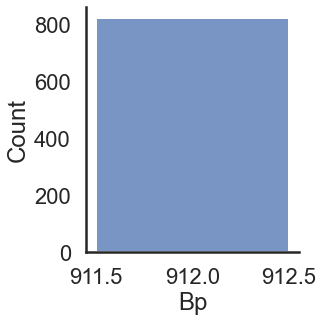

In [33]:
sns.displot(df.groupby(['run_id' ]).Bp.count().reset_index().sort_values('Bp').Bp)
plt.show()

In [60]:
mse_df.sort_values('MSE').groupby('model').head(7).sort_values(['model', 'MSE'])[['MSE', 'model', 'idx', 'sen_param', 'sen_param_value']].to_excel('debug_params.xlsx')

In [35]:
mse_df.nsmallest(columns='MSE', n=20)

Unnamed: 0 Sample  id full name   Group  compare_points        MSE  \
2316           0    1A0   1    Axenic  Axenic            74.0  49.221748   
1227           0    1A0   1    Axenic  Axenic            74.0  54.667101   
1461           0    1A0   1    Axenic  Axenic            74.0  54.667570   
2334           0    1A0   1    Axenic  Axenic            74.0  54.667616   
1467           0    1A0   1    Axenic  Axenic            74.0  54.667865   
258            0    1A0   1    Axenic  Axenic            74.0  54.668242   
687            0    1A0   1    Axenic  Axenic            74.0  54.668722   
81             0    1A0   1    Axenic  Axenic            74.0  54.669334   
420            0    1A0   1    Axenic  Axenic            74.0  54.669520   
303            0    1A0   1    Axenic  Axenic            74.0  54.670114   
1305           0    1A0   1    Axenic  Axenic            74.0  54.670338   
2091           0    1A0   1    Axenic  Axenic            74.0  54.671108   
360            0    1A0   1    Axenic  Axenic            74.0  54.671425   
657            0    1A0   1    Axenic  Axenic            74.0  54.672311   
978            0    1A0   1    Axenic  Axenic            74.0  54.672374   
1587           0    1A0   1    Axenic  Axenic            74.0  54.672923   
1893           0    1A0   1    Axenic  Axenic            74.0  54.673761   
1062           0    1A0   1    Axenic  Axenic            74.0  54.673988   
1083           0    1A0   1    Axenic  Axenic            74.0  54.674102   
921            0    1A0   1    Axenic  Axenic            74.0  54.674843   

                                                 run_id sen_param_model idx  \
2316  param_sensitivity_ponly_MIN_Mp_7_h-39004178708...          MIN_Mp   7   
1227  param_sensitivity_ponly_MIN_KINp_19_h743791071...        MIN_KINp  19   
1461  param_sensitivity_ponly_MIN_KICp_0_h4644819937...        MIN_KICp   0   
2334  param_sensitivity_ponly_MIN_VmaxINp_1_h8123056...     MIN_VmaxINp   1   
1467  param_sensitivity_ponly_MIN_KICp_1_h5779443188...        MIN_KICp   1   
258   param_sensitivity_ponly_MIN_KICp_2_h7470809639...        MIN_KICp   2   
687   param_sensitivity_ponly_MIN_KICp_3_h6103158055...        MIN_KICp   3   
81    param_sensitivity_ponly_MIN_KICp_4_h-428775109...        MIN_KICp   4   
420   param_sensitivity_ponly_MIN_KINp_18_h-63077074...        MIN_KINp  18   
303   param_sensitivity_ponly_MIN_KICp_5_h3084452923...        MIN_KICp   5   
1305  param_sensitivity_ponly_MIN_VmaxINp_2_h-683010...     MIN_VmaxINp   2   
2091  param_sensitivity_ponly_MIN_KICp_6_h1346303632...        MIN_KICp   6   
360   param_sensitivity_ponly_MIN_KINp_17_h-47638185...        MIN_KINp  17   
657   param_sensitivity_ponly_MIN_VmaxINp_3_h6340868...     MIN_VmaxINp   3   
978   param_sensitivity_ponly_MIN_KICp_7_h1557582562...        MIN_KICp   7   
1587  param_sensitivity_ponly_MIN_KINp_16_h-25790666...        MIN_KINp  16   
1893  param_sensitivity_ponly_MIN_VmaxINp_4_h-902519...     MIN_VmaxINp   4   
1062  param_sensitivity_ponly_MIN_KICp_8_h2484321614...        MIN_KICp   8   
1083  param_sensitivity_ponly_MIN_KINp_15_h122598870...        MIN_KINp  15   
921   param_sensitivity_ponly_MIN_VmaxINp_5_h5854378...     MIN_VmaxINp   5   

     model sen_param  sen_param_value  
2316   MIN        Mp         0.000001  
1227   MIN      KINp         1.427508  
1461   MIN      KICp         0.014275  
2334   MIN   VmaxINp         0.000010  
1467   MIN      KICp         0.018190  
258    MIN      KICp         0.023180  
687    MIN      KICp         0.029537  
81     MIN      KICp         0.037638  
420    MIN      KINp         1.120251  
303    MIN      KICp         0.047962  
1305   MIN   VmaxINp         0.000013  
2091   MIN      KICp         0.061116  
360    MIN      KINp         0.879128  
657    MIN   VmaxINp         0.000017  
978    MIN      KICp         0.077879  
1587   MIN      KINp         0.689905  
1893   MIN   VmaxINp         0.000022  
1062   MIN      KICp         

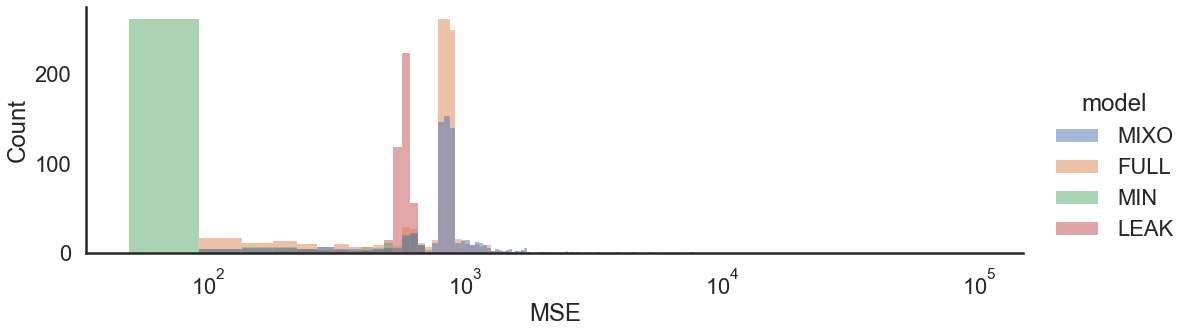

In [36]:
sns.displot(mse_df, x='MSE',aspect=3, hue='model')
#sns.distplot(sum_df.p_err, label='P')
#sns.distplot(sum_df.error, label='Total')
#plt.legend()
plt.xscale('log')
plt.show()


In [37]:
df.min()

Unnamed: 0                                                         0
Bp                                                               0.0
DON                                                          0.00163
RDON                                                             0.0
DIN                                                     -4860.548432
DOC                                                         0.016086
RDOC                                                             0.0
DIC                                                          0.00892
ROS                                                         0.049402
ABp                                                              0.0
ABh                                                              0.0
t                                                                0.0
day                                                              0.0
Bp[C]                                                            0.0
ABp[C]                            

In [38]:
basedf.min()

Unnamed: 0                      0
Bp                            0.0
DON                      0.018171
RDON                          0.0
DIN                       0.00376
DOC                         132.5
RDOC                          0.0
DIC                       0.34374
ROS                      0.049402
ABp                           0.0
ABh                           0.0
t                             0.0
day                           0.0
Bp[C]                         0.0
ABp[C]                        0.0
ABh[C]                        0.0
run_id        baseline_ponly_FULL
model                        FULL
dtype: object

In [39]:
mse_df['mode'] = 'sensitivity'
mse_df.loc[mse_df.idx.isin(['baseline']), 'mode'] = 'baseline'


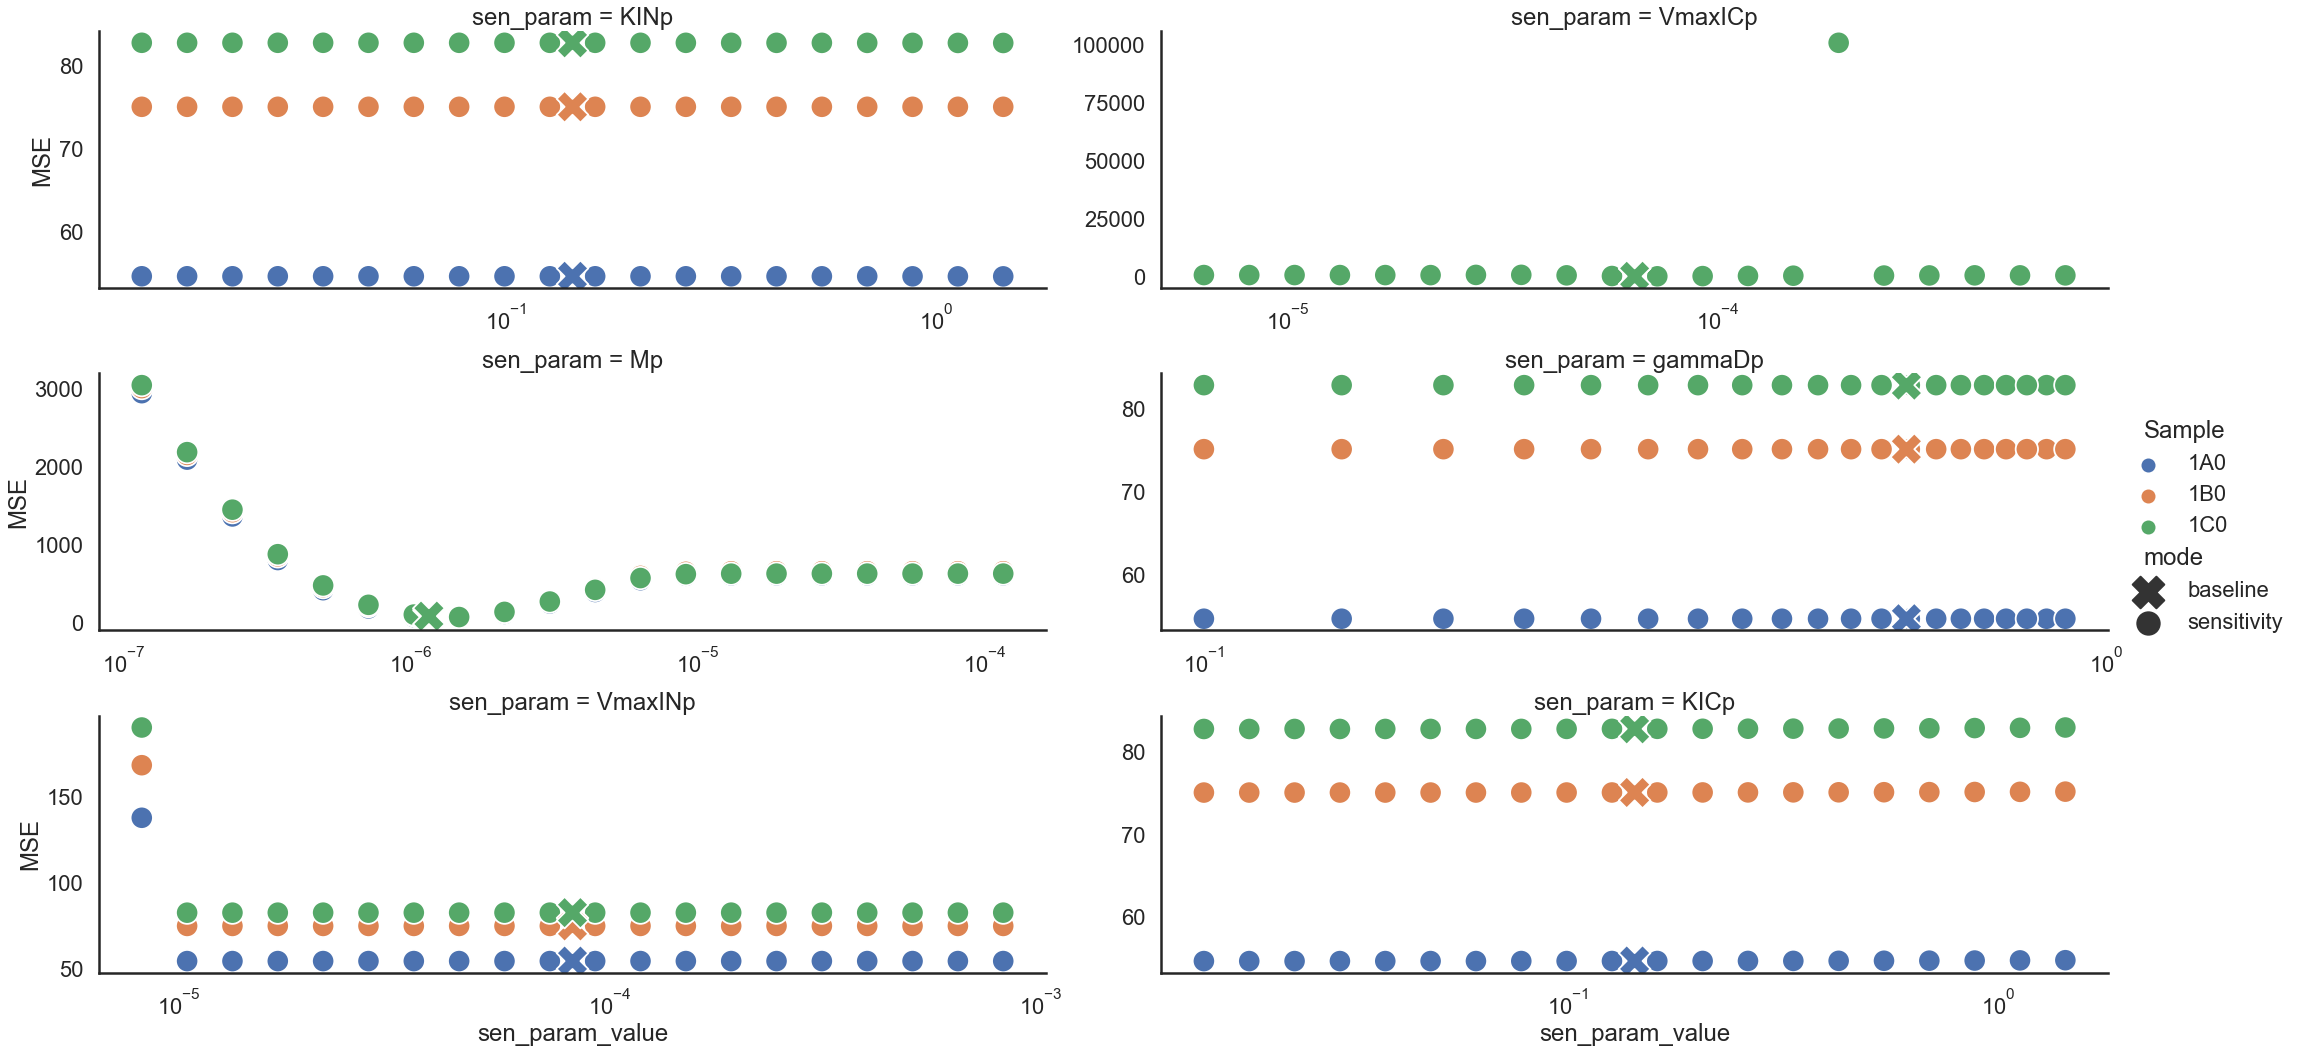

In [63]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['MIN'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    col='sen_param', col_wrap=2,
    hue='Sample', 
    style ='mode',
    aspect=3, size='mode', size_order=['baseline', 'sensitivity'], sizes=(500,1000),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')

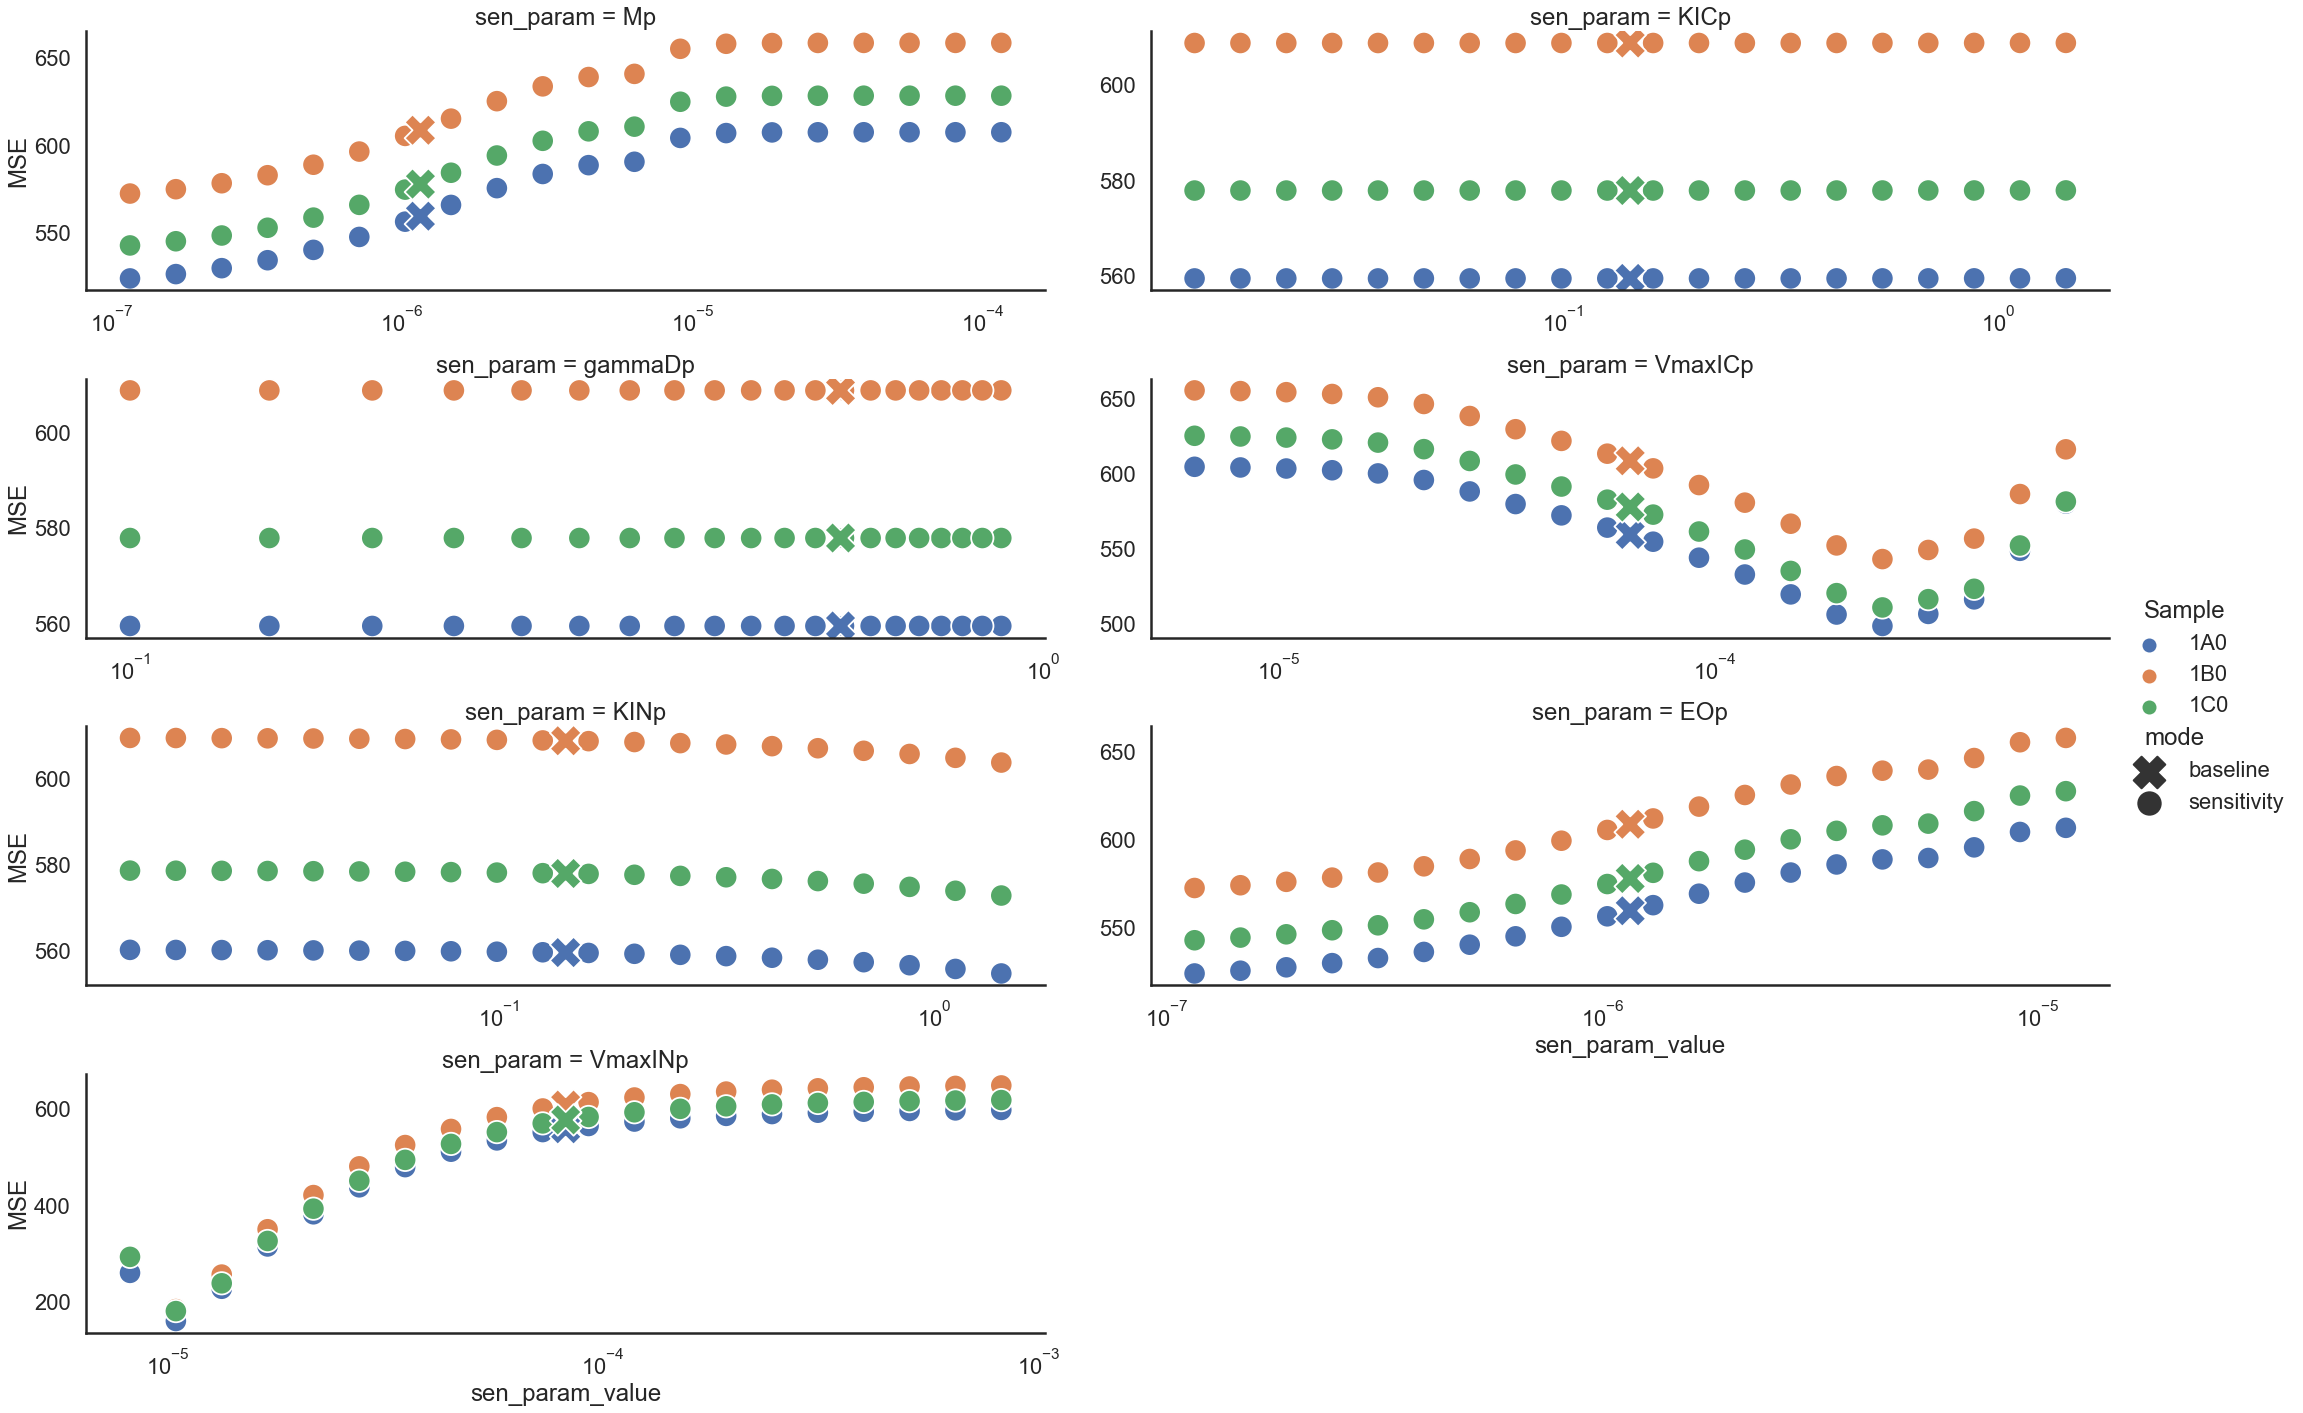

In [64]:
sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['LEAK'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    col='sen_param', col_wrap=2,
    hue='Sample', 
    style ='mode',
    aspect=3, size='mode', size_order=['baseline', 'sensitivity'], sizes=(500,1000),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
).set(xscale='log')

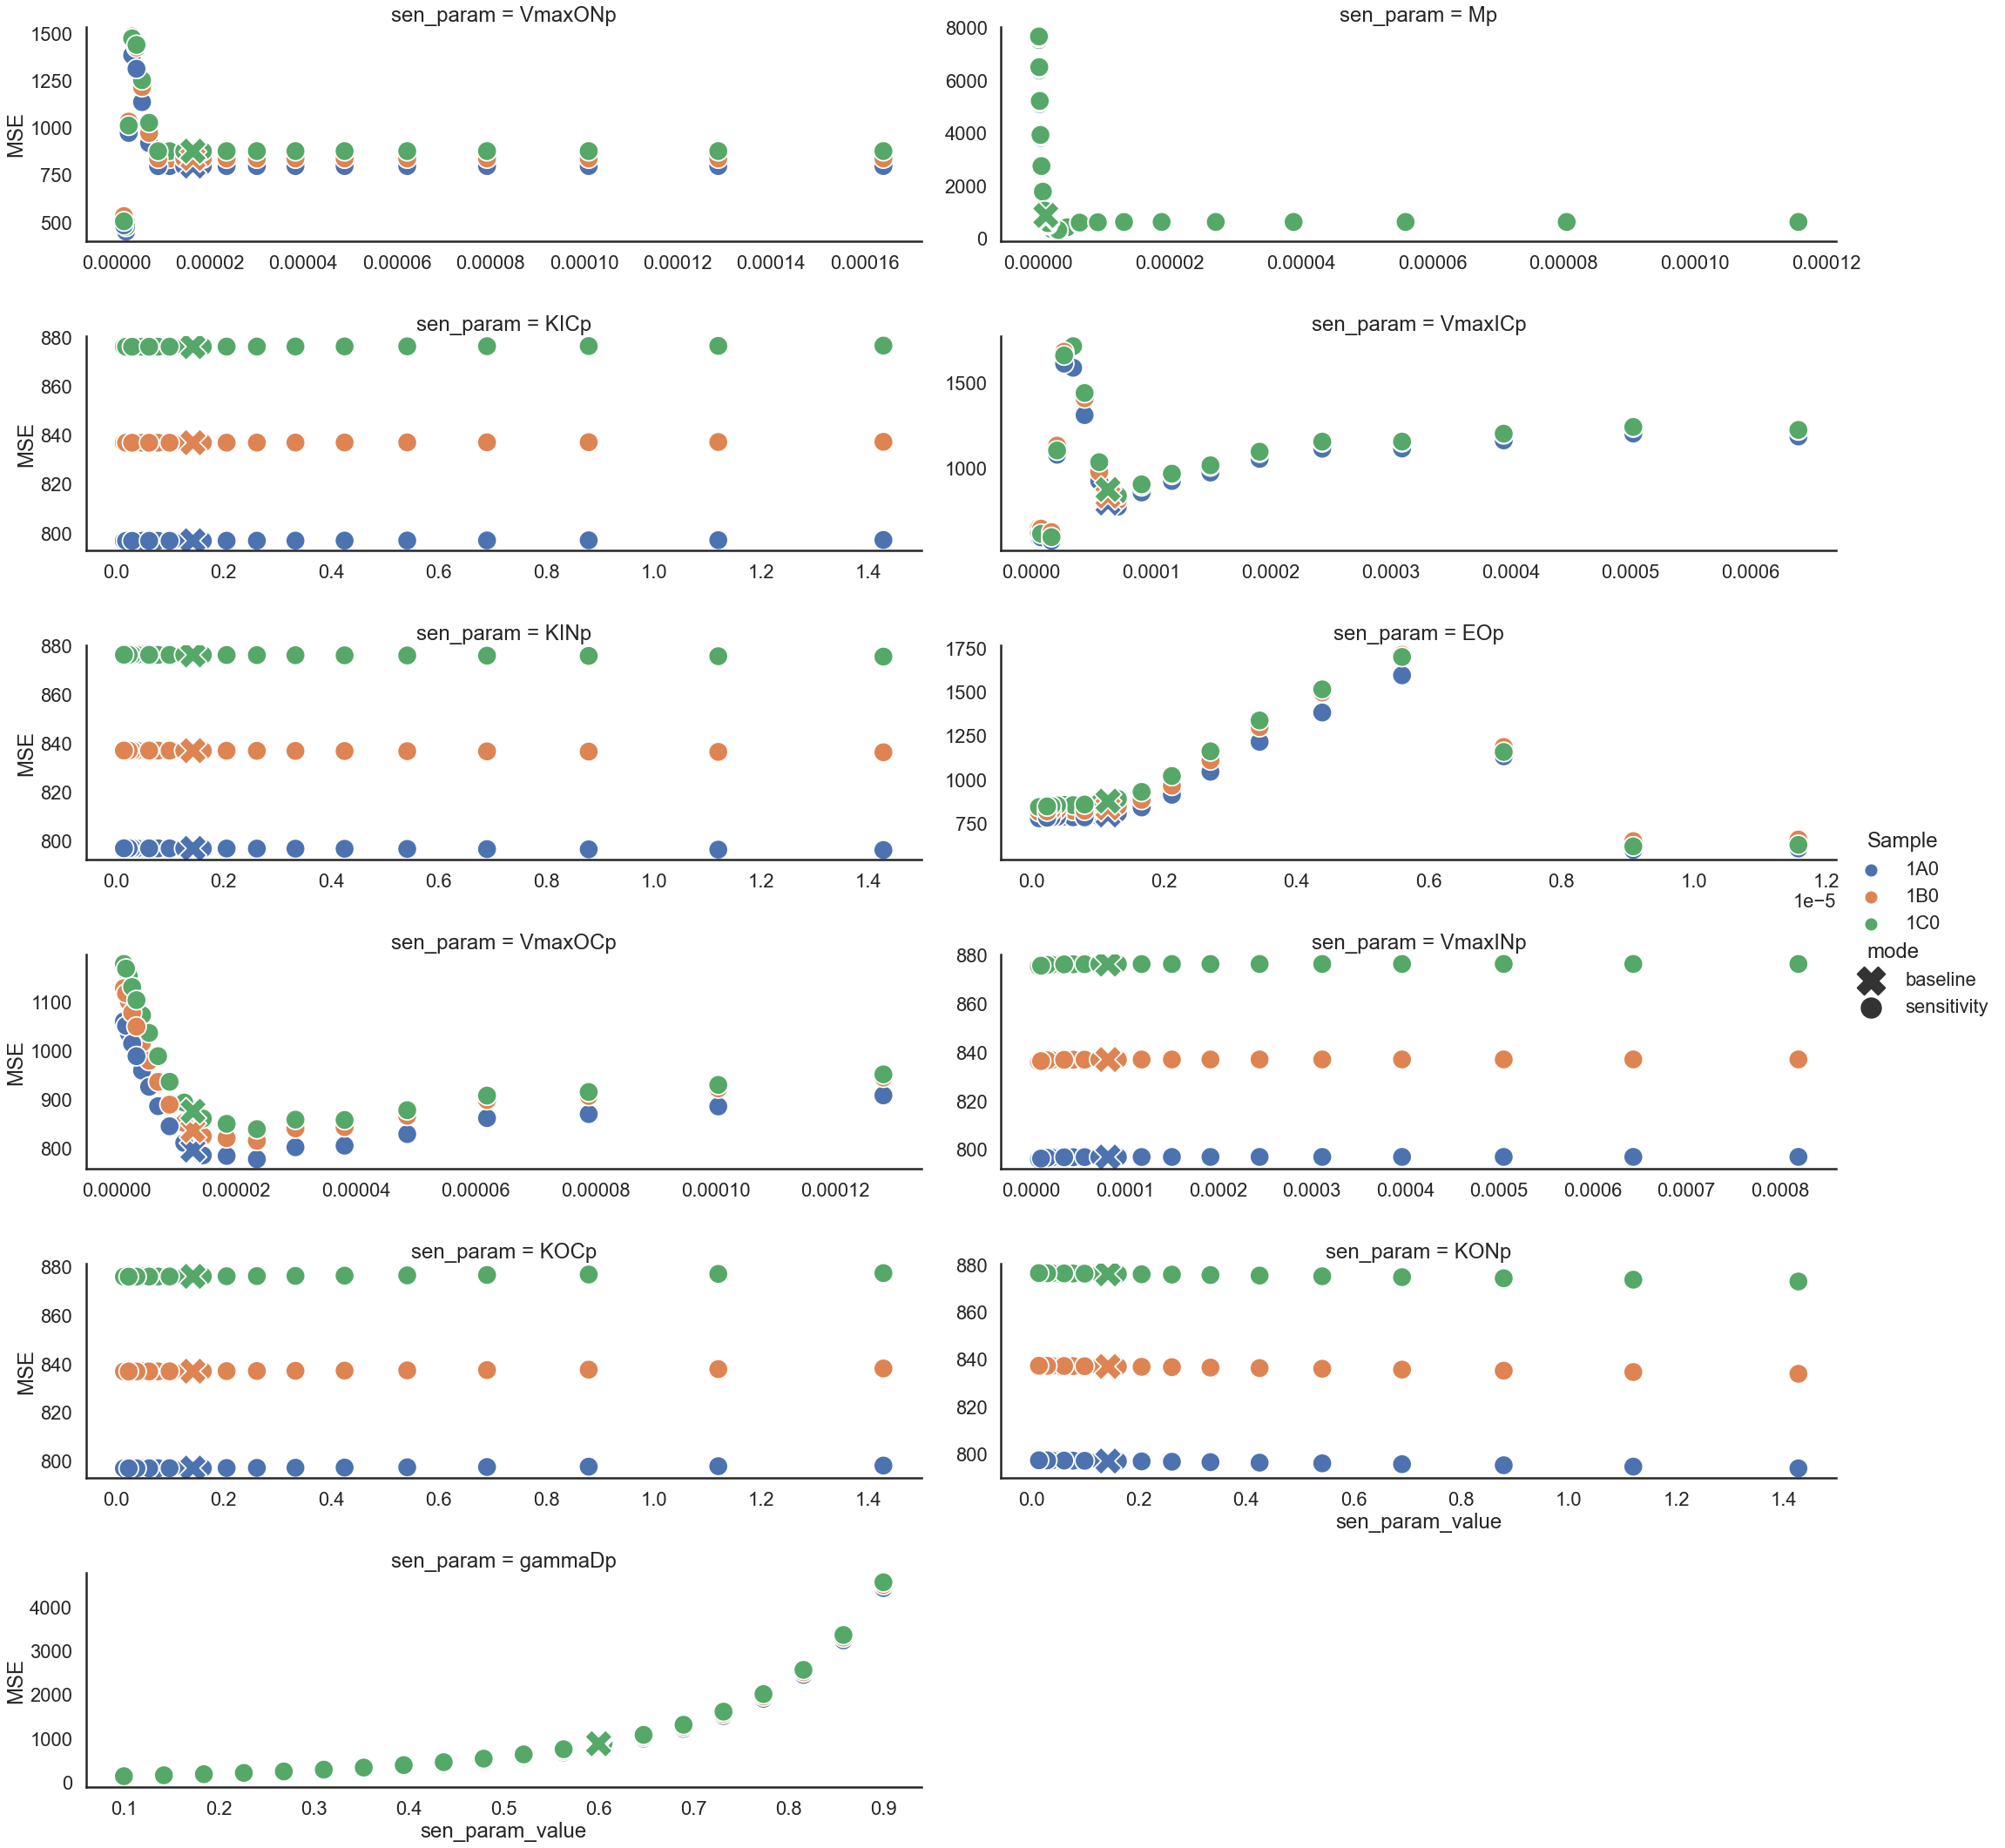

In [42]:
sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['MIXO'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    col='sen_param', col_wrap=2,
    hue='Sample', 
    style ='mode',
    aspect=3, size='mode', size_order=['baseline', 'sensitivity'], sizes=(500,1000),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(xscale='log')

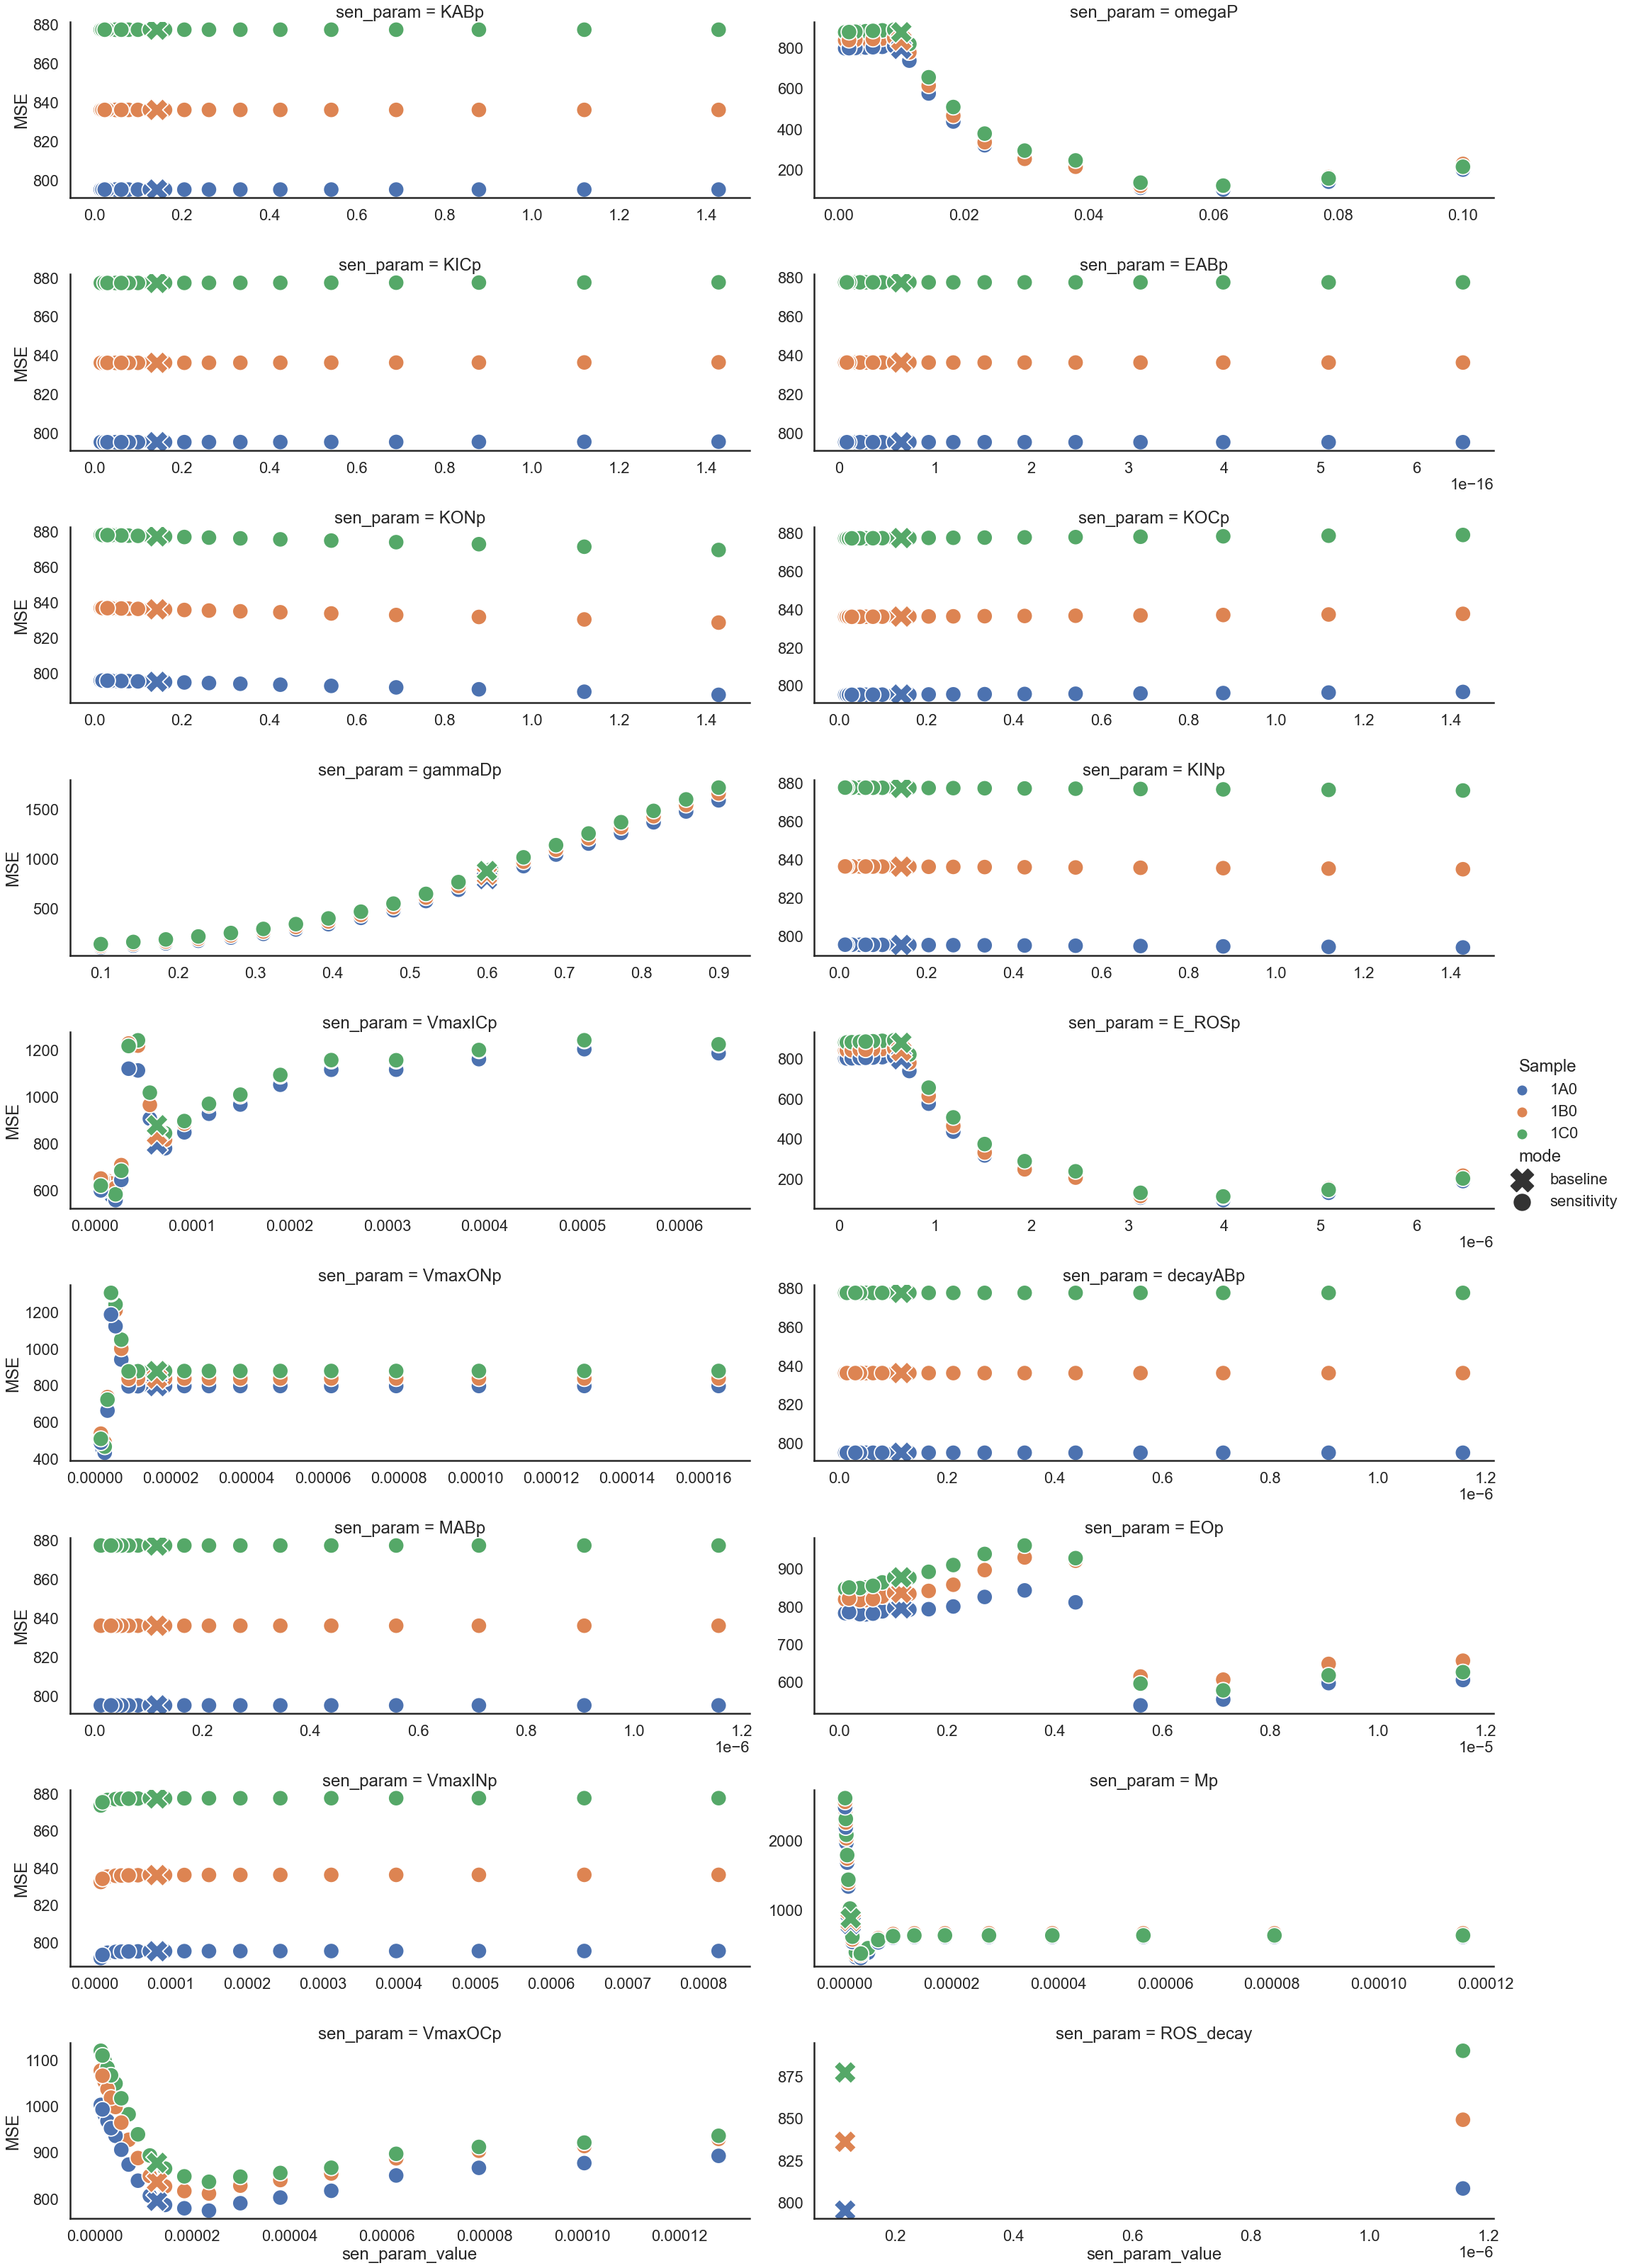

In [43]:
sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['FULL'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    col='sen_param', col_wrap=2,
    hue='Sample', 
    style ='mode',
    aspect=3, size='mode', size_order=['baseline', 'sensitivity'], sizes=(500,1000),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(xscale='log')

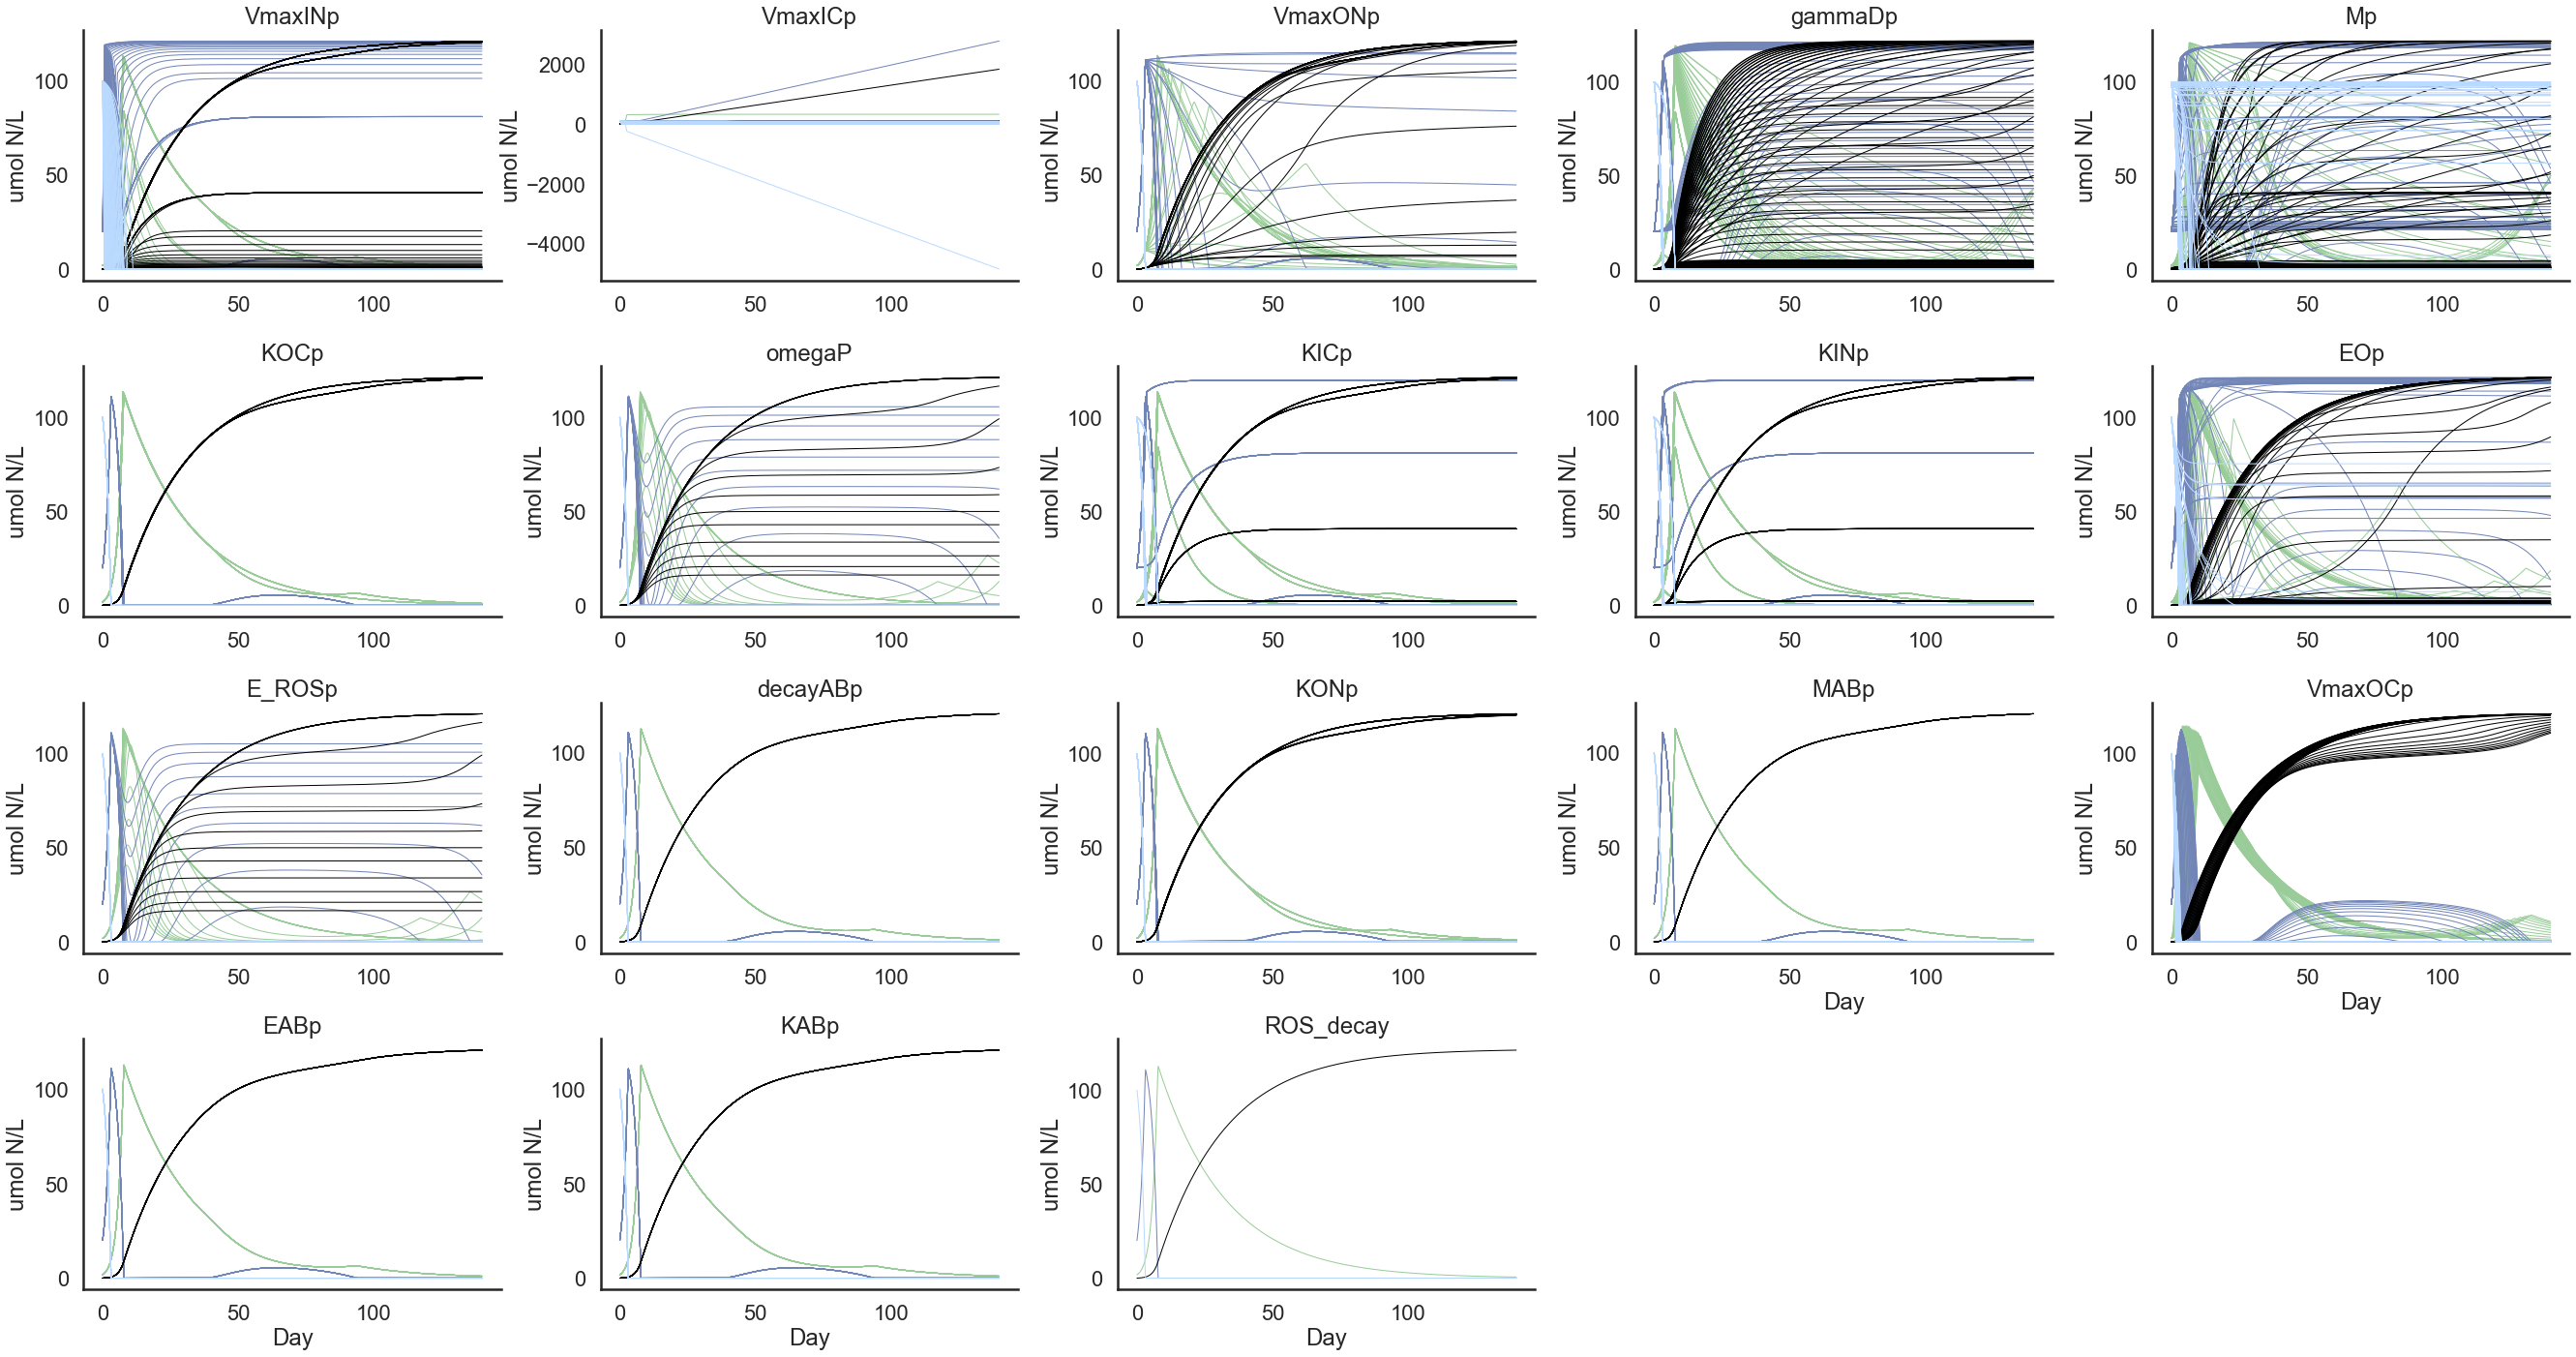

In [44]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=pnorder)                            
mdf2['Day'] =mdf2['day'].round(5)
#mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
mdf2['param_name'] =  mdf2['sen_param'] 

#mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


g = sns.relplot(
    data=mdf2, 
    x='Day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    estimator=None, units='run_id',
    col='sen_param', #col_order= paramorder,
    col_wrap=5,
    kind='line', lw=1,
    aspect=1.5, legend=False,
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
    
)
    


#g.map_dataframe(pp)


g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)
plt.show()

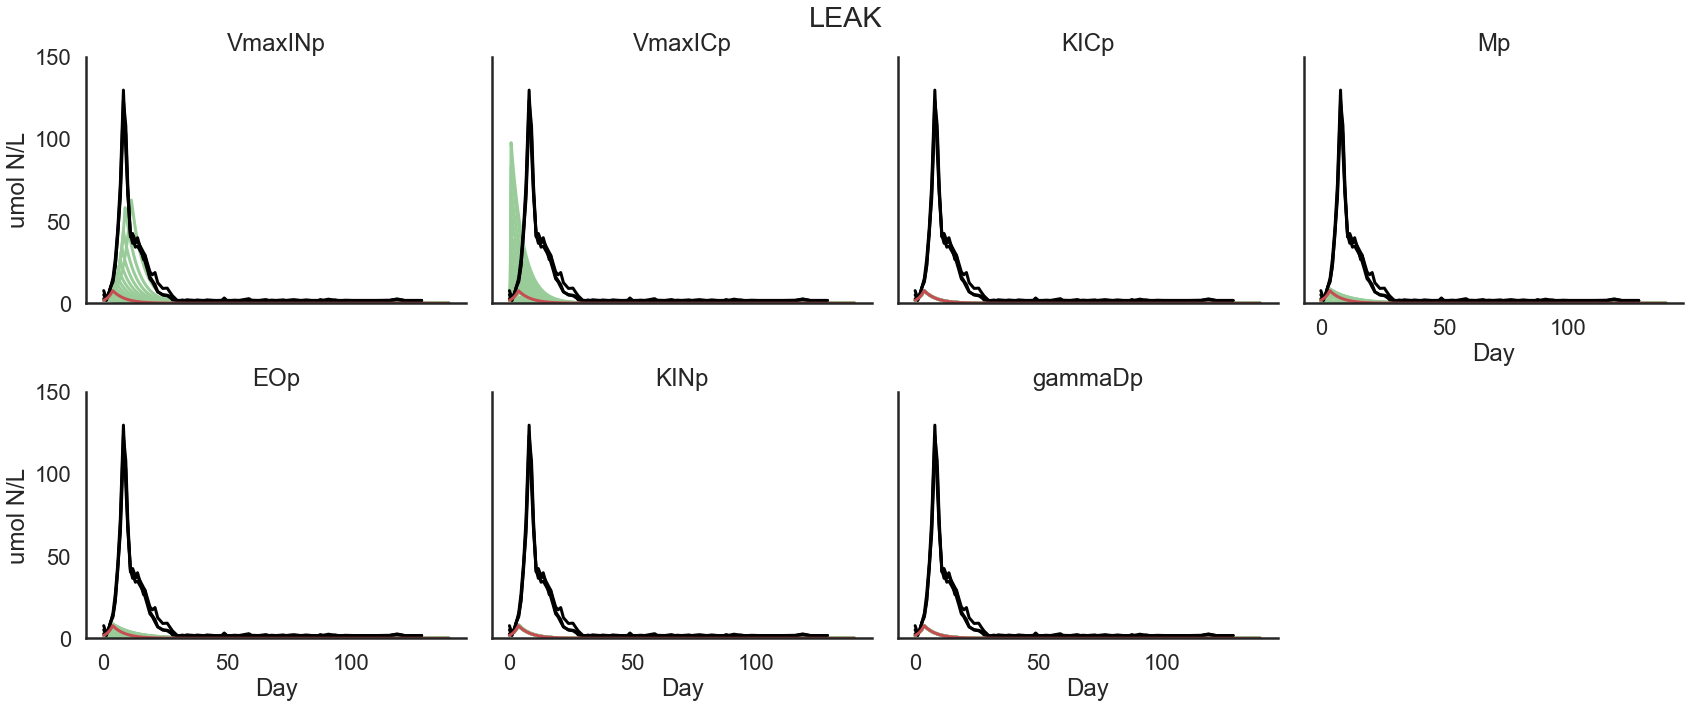

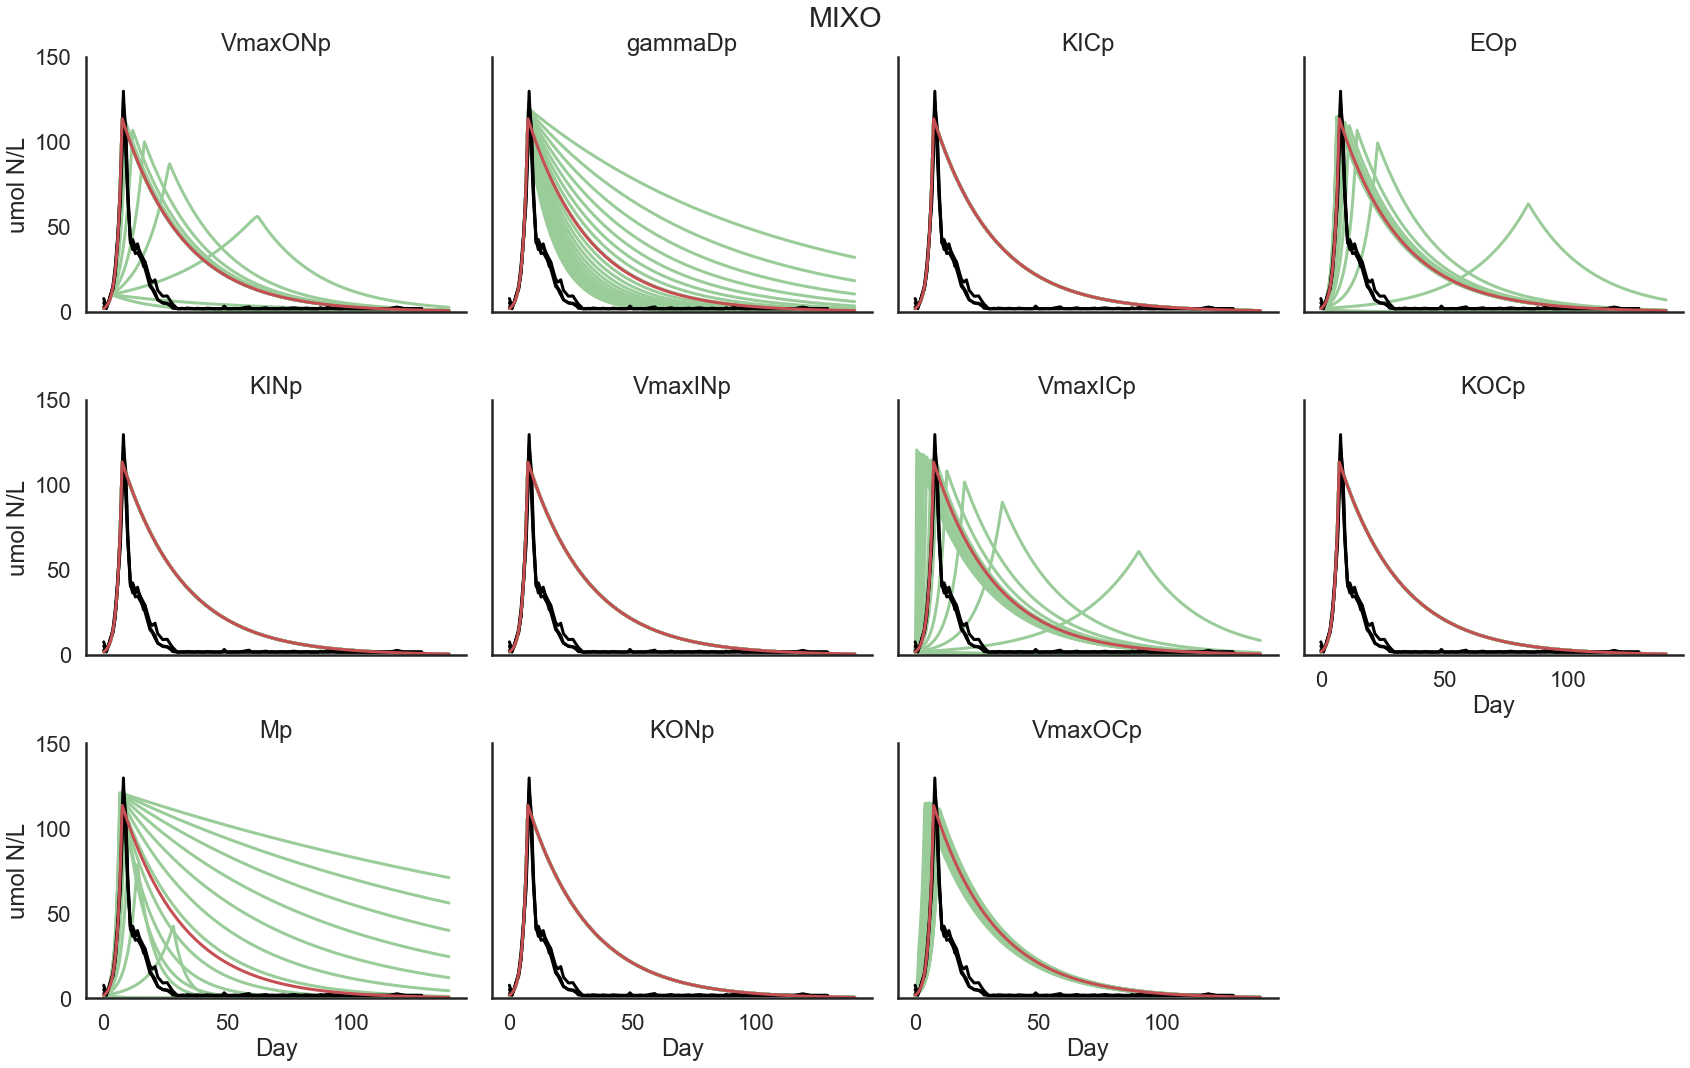

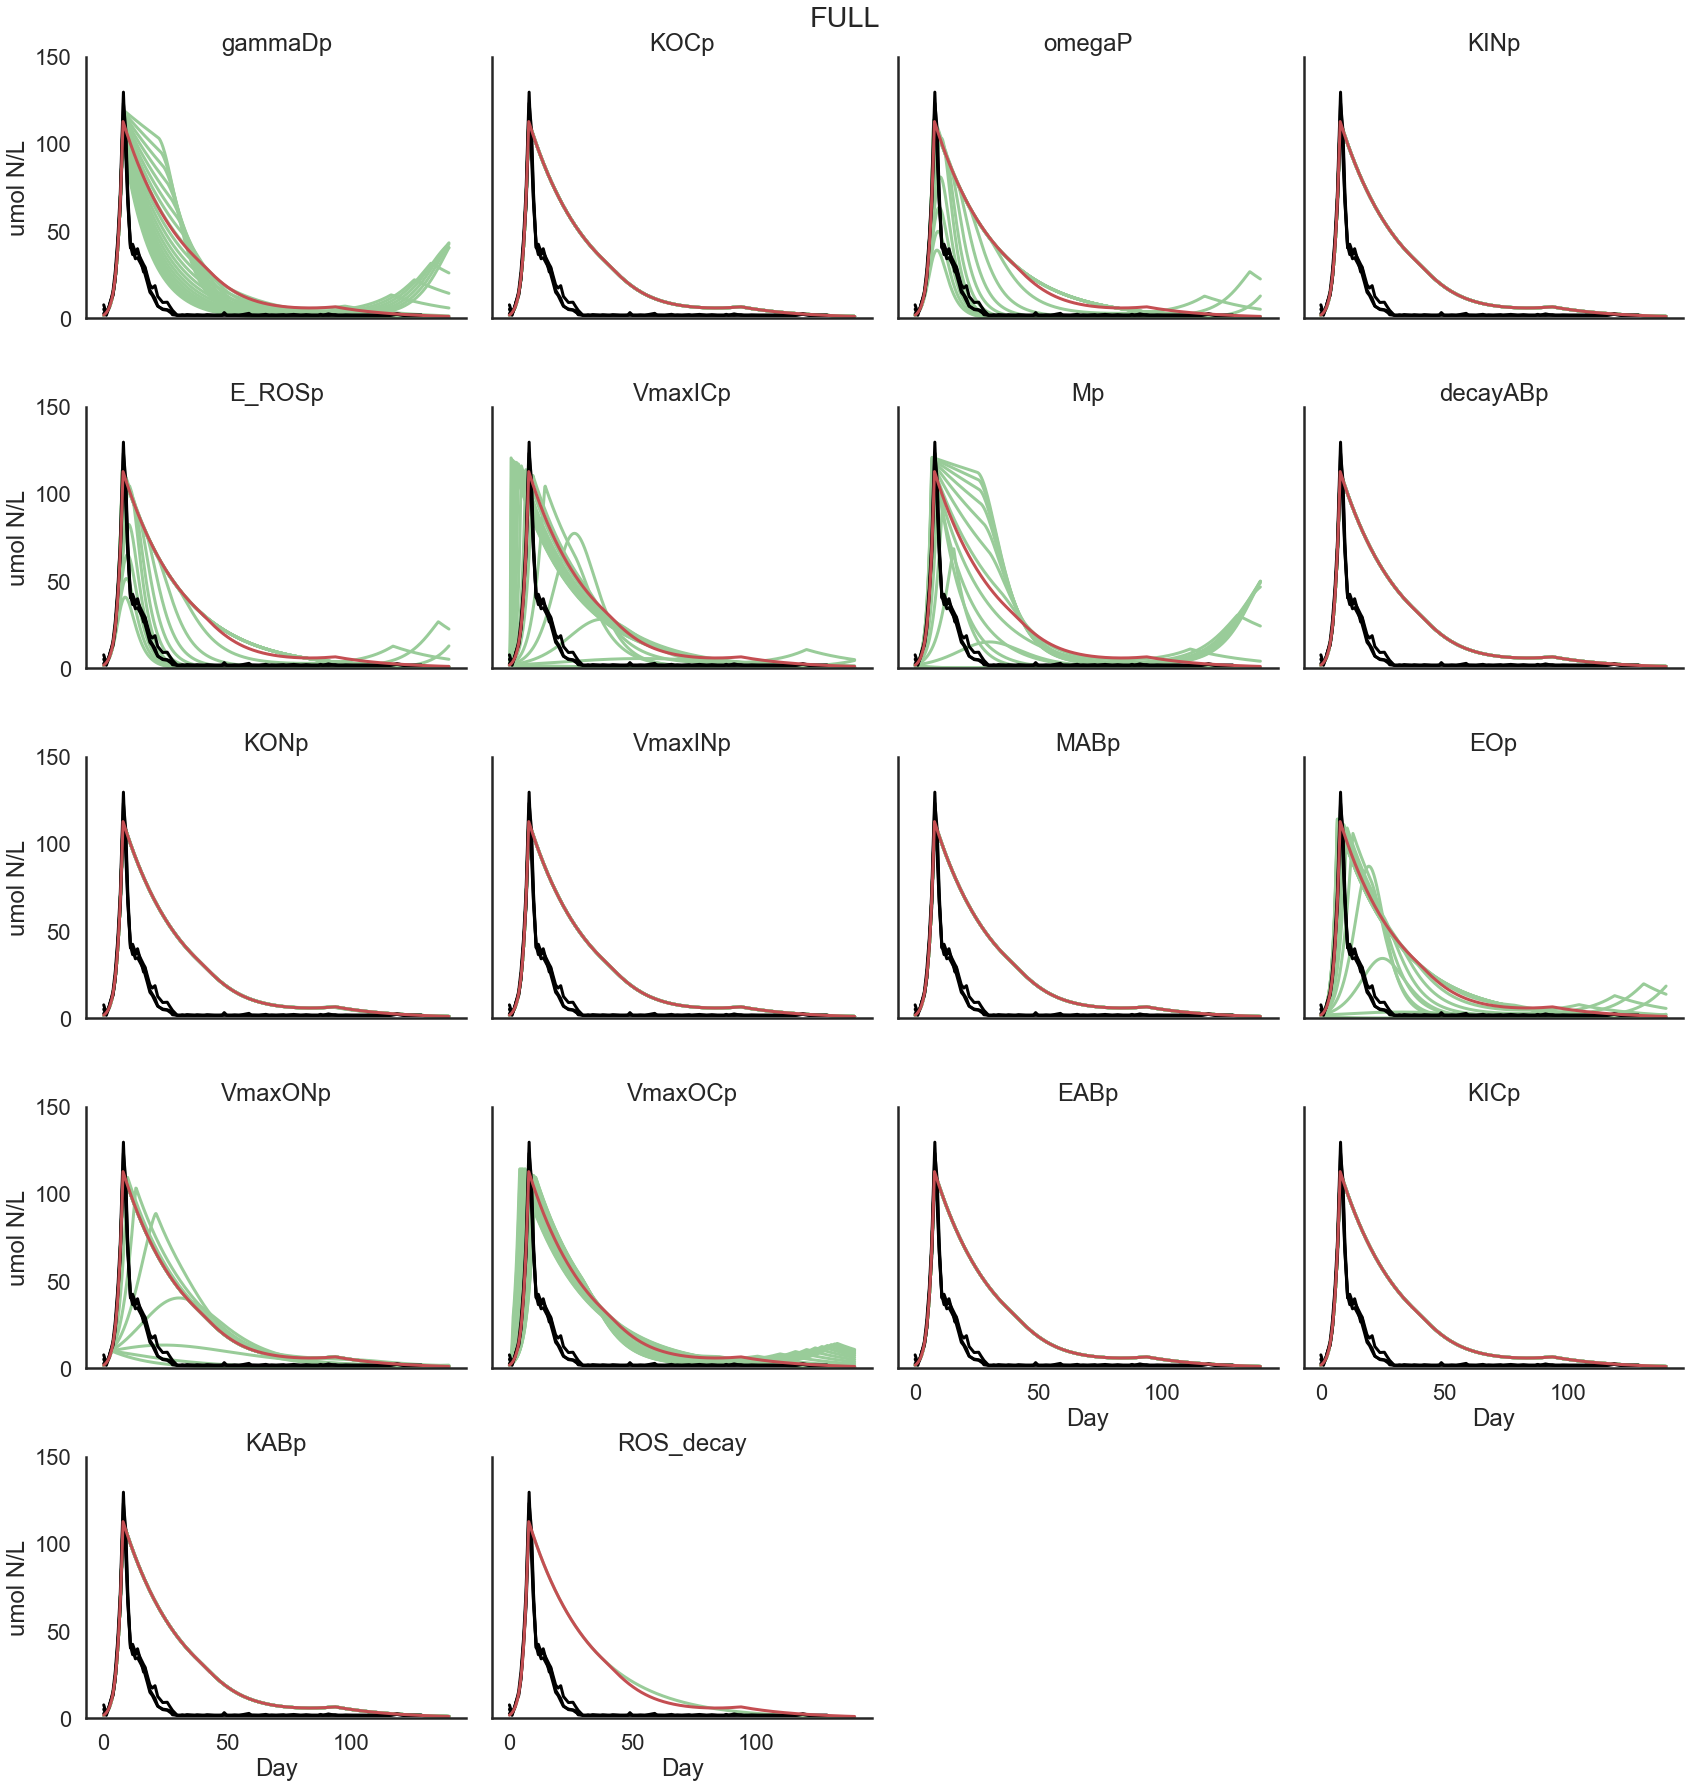

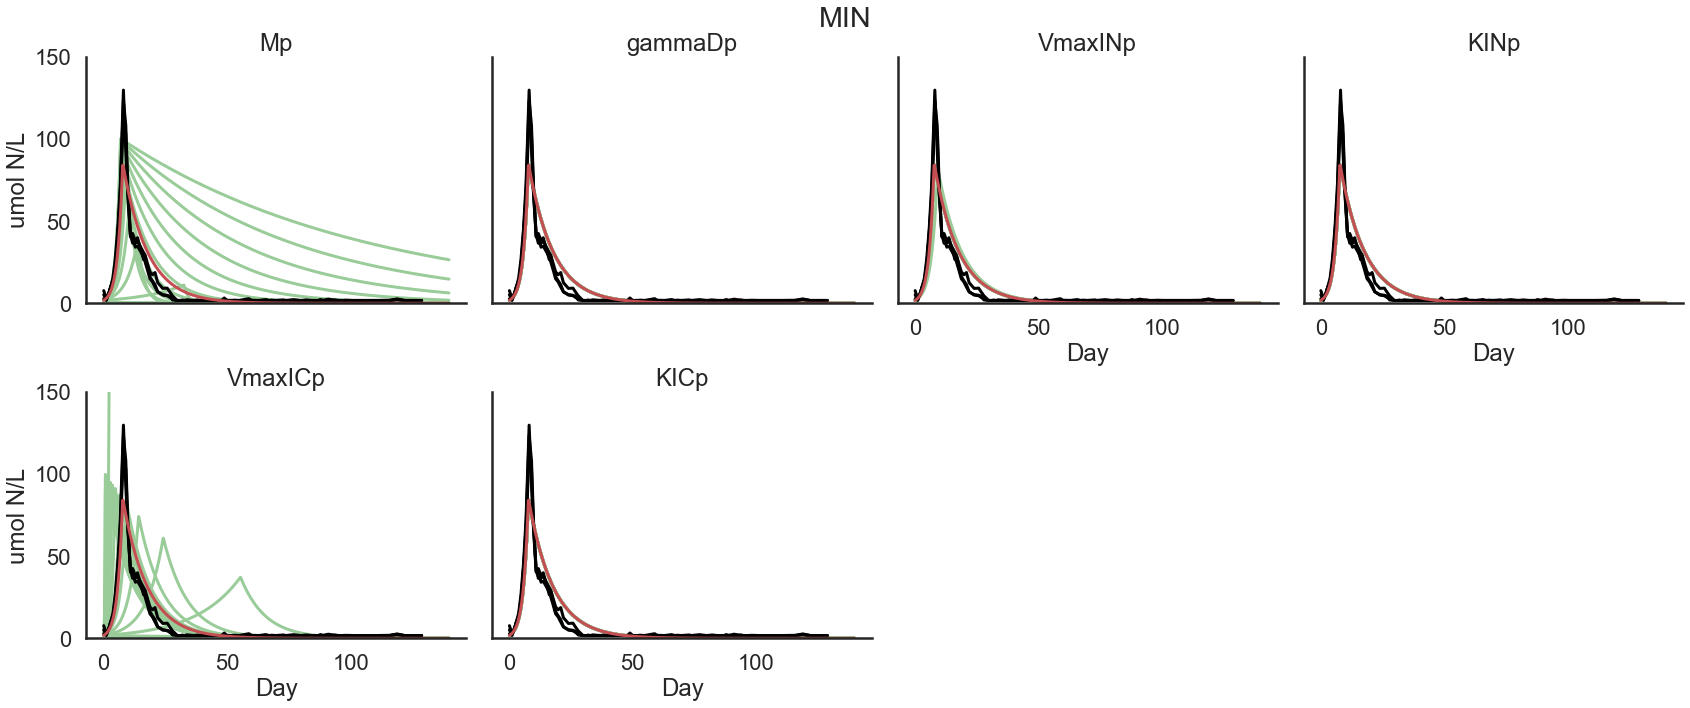

In [67]:
for m in df.model.unique():
    mdf2 = df.loc[df.model.isin([m])].melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=['Bp'])                            
    mdf2['Day'] =mdf2['day'].round(5)
    #mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
    mdf2['param_name'] =  mdf2['sen_param'] 

    #mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


    g = sns.relplot(
        data=mdf2, 
        x='Day', y='value',
        hue='variable', palette=[PCOLOR], #hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        col='sen_param', #col_order= paramorder,
        col_wrap=4,
        kind='line', #lw=1,
        aspect=1.2, legend=False,
    ).set(ylim=(0,150))

    for ax in g.axes:
        sns.lineplot(
            data=refdf.loc[refdf.Group.isin(['Axenic'])],
            x='day', y='ref_Bp',
            estimator=None, units='Sample',
            color='black', ax=ax
        )
        sns.lineplot(
            data=basedf.loc[basedf.model.isin([m])],
            x='day', y='Bp',
            #estimator=None, units='Sample',
            color='r', ax=ax
        )
        

    #g.map_dataframe(pp)


    g.set(ylabel='umol N/L')
    g.set_titles(col_template='{col_name}',)
    plt.suptitle(m, y=1)
    plt.show()

In [46]:
mse_df.loc[mse_df.model.isin(['MIN'])].drop_duplicates(['run_id']).groupby (['sen_param', 'model'])['idx'].count()

sen_param  model
KICp       MIN      20
KINp       MIN      20
Mp         MIN      21
VmaxICp    MIN      20
VmaxINp    MIN      20
gammaDp    MIN      20
Name: idx, dtype: int64

In [47]:
lowest_ids = mse_df.nsmallest(columns='MSE', n=10)['run_id']

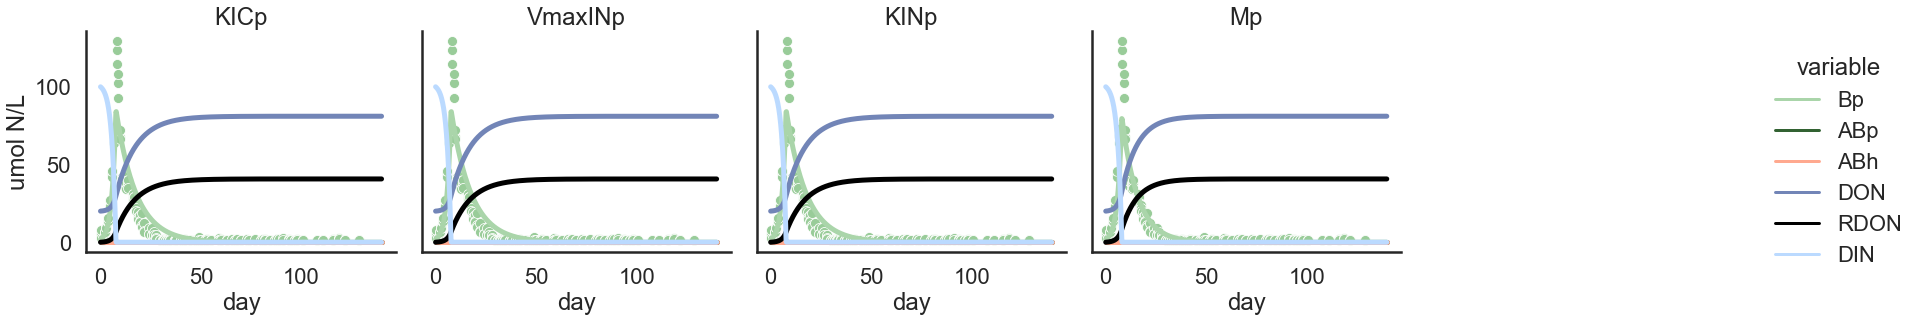

In [48]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=pnorder)                            
mdf2['Day'] =mdf2['day'].round(5)
#mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
mdf2['param_name'] =  mdf2['sen_param'] 

g = sns.relplot(
    data=mdf2.loc[mdf2.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=pnorder, palette=pnpalette,
    #estimator=None, units='run_id',
    col='sen_param', #col_order=lowest_ids, 
    col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf.loc[refdf.Group.isin(['Axenic'])], x='day', y='ref_Bp', ax=ax, s=100, legend=False, color=PCOLOR)
    #sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [49]:
plt.show()

In [50]:
lowest_ids

2316    param_sensitivity_ponly_MIN_Mp_7_h-39004178708...
1227    param_sensitivity_ponly_MIN_KINp_19_h743791071...
1461    param_sensitivity_ponly_MIN_KICp_0_h4644819937...
2334    param_sensitivity_ponly_MIN_VmaxINp_1_h8123056...
1467    param_sensitivity_ponly_MIN_KICp_1_h5779443188...
258     param_sensitivity_ponly_MIN_KICp_2_h7470809639...
687     param_sensitivity_ponly_MIN_KICp_3_h6103158055...
81      param_sensitivity_ponly_MIN_KICp_4_h-428775109...
420     param_sensitivity_ponly_MIN_KINp_18_h-63077074...
303     param_sensitivity_ponly_MIN_KICp_5_h3084452923...
Name: run_id, dtype: object